In [1]:
import os 
import matplotlib.pyplot as plt
from pprint import pprint
from tqdm.notebook import tqdm_notebook, tqdm
tqdm.pandas()
import random
from pprint import pprint
import re

import numpy as np
import pandas as pd

#Gensim 
import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#Spacy
import spacy 

#Vis
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()

# import warnings
%matplotlib inline

import winsound
duration = 500  # milliseconds
freq = 440  # Hz

C:\Users\asanchez\AppData\Local\Continuum\anaconda3\envs\VirEnv_1\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# # Set up log to external log file
# import logging
# logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# # Set up log to terminal
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
os.chdir("/Users/asanchez/OneDrive - Gongos, Inc/Desktop/Deltek LDA Analysis")

In [4]:
df_debrief = pd.read_excel("Copy of 2021 Debrief Notes.xlsx")

In [5]:
df_debrief.head(1)

,Project,Name,Debrief Date,Lessons Learned,Successes,Positive Impact?,Oversight,Project Manager,Contact 3,Contact 4,Contact 5,Contact 6
0,ABC210399R,2021 Wellspan Consumer Segmentation,2021-06-23,They need help with Sample Management. They a...,They (clients) bought into our solution off th...,Yes,"Hafner, Meaghan","Hafner, Meaghan",NaN,NaN,NaN,NaN


In [6]:
df_detail = pd.read_excel("Client Metrics_CC Team Mapping.xlsx", sheet_name= 'Jan - Nov Detail Metrics')
df_firms = pd.read_excel("Client Metrics_CC Team Mapping.xlsx", sheet_name= 'Firms')
df_client_list = pd.read_excel("Client Listing - Gongos.xlsx")

In [7]:
columns = ['Client\nName','Client\nNumber','Client Manager']
df_client_list = df_client_list[columns]

In [8]:
df_firms_merged = df_firms.merge(df_client_list, left_on ='Name', right_on ='Client\nName', how='inner')

In [9]:
columns = ['Name', 'Client\nNumber', 'Client Class_x', 'Client Class_y', 'Industry Description','CC Team','Client Manager']

In [10]:
df_debrief['Abbreviation']=df_debrief.Project.apply(lambda x: x[:3])

In [11]:
columns = ['Project','Name','Abbreviation','Debrief Date','Lessons Learned','Successes','Positive Impact?','Oversight','Project Manager']
df_debrief = df_debrief[columns]

In [12]:
df_firms_merged = df_debrief.merge(df_firms_merged, left_on='Abbreviation', right_on='Client\nNumber', how='left')

In [13]:
def extract_project_label(text):
    if type(text) != str:
        return np.nan
    if re.match(r'[A-Z]{3}[0-9]{6}[A-Z]{1}', string=text):
        proj_num = re.match(r'[A-Z]{3}[0-9]{6}[A-Z]{1}', string=text)
        start =  proj_num.span()[0]
        end = proj_num.span()[-1]
        return text[start:end]

test = df_detail['Footer Field 1'][0]
test

'BCA190420R 2020 BDM Community'

In [14]:
df_detail['Proj_name'] = df_detail['Footer Field 1'].apply(extract_project_label)

In [15]:
final_df = df_firms_merged.merge(df_detail, left_on='Project', right_on='Proj_name', how='left')
final_df.columns

Index(['Project', 'Name_x', 'Abbreviation', 'Debrief Date', 'Lessons Learned',
       'Successes', 'Positive Impact?', 'Oversight', 'Project Manager',
       'Name_y', 'CC Team_x', 'Client Class_x', 'Industry Description',
       'Status Description', 'Client\nName', 'Client\nNumber',
       'Client Manager', 'Header Field 1', 'Footer Field 1', 'CC Team_y',
       'Client Class_y', 'Custom Revenue', 'Expenses', 'Net Revenue', 'NR %',
       'Custom Labor Amount', 'Gross Margin', 'GM %', 'GPPL $', 'Custom Hours',
       'Proj_name'],
      dtype='object')

In [16]:
columns = ['Project', 'Abbreviation', 'Name_x', 'Name_y','Debrief Date', 'Lessons Learned', 'Successes', 'Positive Impact?', 'Oversight', 
          'Project Manager', 'Client Class_y', 'Client Manager', 'Header Field 1',
       'Footer Field 1', 'CC Team_y', 'Client Class_x', 'Custom Revenue',
       'Expenses', 'Net Revenue', 'NR %', 'Custom Labor Amount',
       'Gross Margin', 'GM %', 'GPPL $', 'Custom Hours']
df = final_df[columns]

In [17]:
df.rename({'Name_y':'Client_Name', 'Name_x':'Project_Name', 'Abbreviation':'Client Number', 
          'Client Class_x':'Client_Classification'}, axis=1, inplace=True)

C:\Users\asanchez\AppData\Local\Continuum\anaconda3\envs\VirEnv_1\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:
# export merged dataset as csv
df.to_csv('merged_df.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Project                362 non-null    object        
 1   Client Number          362 non-null    object        
 2   Project_Name           362 non-null    object        
 3   Client_Name            354 non-null    object        
 4   Debrief Date           362 non-null    datetime64[ns]
 5   Lessons Learned        346 non-null    object        
 6   Successes              359 non-null    object        
 7   Positive Impact?       362 non-null    object        
 8   Oversight              294 non-null    object        
 9   Project Manager        354 non-null    object        
 10  Client Class_y         360 non-null    object        
 11  Client Manager         330 non-null    object        
 12  Header Field 1         360 non-null    object        
 13  Foote

# Preprocessing

In [20]:
# !python -m spacy download en_core_web_lg
# load pretrained model
nlp = spacy.load("en_core_web_lg", disable=["parser", "ner"])

In [21]:
df['Lessons Learned'].fillna("nan", inplace=True)

C:\Users\asanchez\AppData\Local\Continuum\anaconda3\envs\VirEnv_1\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
df['Lessons Learned'].shape[0]

362

In [23]:
# print(nlp.Defaults.stop_words)

In [24]:
nlp.Defaults.stop_words |= {"etc","go","pre","bit","mid","ton","uhc","uhg","big","despite"}

In [25]:
# print(nlp.Defaults.stop_words)

{'across', 'hereafter', 'neither', 'above', 'am', 'seeming', 'more', 'via', 'off', 'yours', 'even', 'towards', 'upon', "'m", 'many', 'nine', "'ll", 'itself', 'which', '‘m', 'just', 'because', 'seems', 'therein', 'among', 'from', 'is', 'been', 'will', 'sixty', 'at', 'uhg', 'something', 'about', 'you', 'get', 'through', 'amount', 'toward', 'n’t', 'mid', '’m', 'below', 'all', '’re', 'uhc', 'behind', '’ll', 'everyone', 'their', 'or', 'whole', 'front', 'whatever', 'onto', 'almost', 'nor', 'unless', 'are', 'and', 'whence', 'big', 'her', 'what', '’ve', 'ton', 'thereafter', 'then', 'anything', 'none', 'thus', 'over', "'d", 'whither', 'into', 'elsewhere', 'both', 'hers', 'despite', 'whereby', 'each', 'beforehand', 'hence', 'while', 'empty', 'bottom', 'ten', 'until', 'these', 'using', 'either', 'last', 'one', 'fifteen', 'say', 'ourselves', 'besides', 'various', 'used', 'seemed', 'mine', 'up', 'our', 'does', 'full', 'show', 'meanwhile', 'together', 'much', 'pre', 'being', 'between', 'bit', 'two',

In [26]:
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM', 'CCONJ','CONJ','AUX']
# removal = ['DET', 'CCONJ', 'CONJ', 'AUX']
#'SCONJ','AUX'

tokens = []

for lesson in nlp.pipe(df['Lessons Learned']):
    proj_tok =  [token.lemma_.lower() for token in lesson if not token.pos_ in removal and not token.is_stop and token.is_alpha]
    #and len(token.lemma_)>=2
#     proj_tok = [_ for _ in proj_tok if _ not in nlp.Defaults.stop_words]
    tokens.append(proj_tok)

In [27]:
df['Tokens'] = tokens
# df.head()

C:\Users\asanchez\AppData\Local\Temp/ipykernel_11372/362149312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = tokens


,Project,Client Number,Project_Name,Client_Name,Debrief Date,Lessons Learned,Successes,Positive Impact?,Oversight,Project Manager,...,Custom Revenue,Expenses,Net Revenue,NR %,Custom Labor Amount,Gross Margin,GM %,GPPL $,Custom Hours,Tokens
0,ABC210399R,ABC,2021 Wellspan Consumer Segmentation,"Advisory Board Company, The",2021-06-23,They need help with Sample Management. They a...,They (clients) bought into our solution off th...,Yes,"Hafner, Meaghan","Hafner, Meaghan",...,48500.00,0.00,48500.00,1.000000,8144.00,40356.00,0.832082,4.955305,161.75,"[need, help, sample, management, go, manage, s..."
1,AMW200296R,AMW,Analytics Phase 2 Change Management,Amway,2021-06-11,"Despite adding value to the D&A team, sometime...",Provided the Amway Data & Analytics team with ...,Yes,"Kaltenborn, Miranda",NaN,...,3434.06,0.00,3434.06,1.000000,0.00,3434.06,1.000000,0.000000,0.00,"[add, value, team, company, politic, way, lead..."
2,AMW200357R,AMW,2020 LGS Retainer,Amway,2021-04-29,need stronger relationship building efforts to...,high efficiency w who was involved in fulfilli...,Yes,"Herzing, Samantha",NaN,...,8207.76,0.00,8207.76,1.000000,1390.75,6817.01,0.830557,4.901679,30.50,"[need, strong, relationship, building, effort,..."
3,AMW200640R,AMW,ANA Knowledge Assessment,Amway,2021-02-12,Ensure we have enough time set aside to progre...,Great work bringing together our institutional...,Yes,NaN,"Kaltenborn, Miranda",...,63791.59,4402.70,59388.89,0.930983,14932.50,44456.39,0.696900,2.977157,266.50,"[ensure, time, set, progress, client, touch, p..."
4,AMW200788R,AMW,A70 Transformation Office CM and Comms,Amway,2021-09-01,Folder structure overly complicated - numbered...,Stretch opportunities across the team\nFlexibl...,Yes,NaN,"Herzing, Samantha",...,498761.00,1074.73,497686.27,0.997845,80506.75,417179.52,0.836432,5.181920,1302.75,"[folder, structure, numbered, system, work, ha..."


In [28]:
# bigrams and trigrams 
bigram_phrases = gensim.models.Phrases(tokens, threshold=50, min_count=5)
trigram_phrases = gensim.models.Phrases(bigram_phrases[tokens], threshold = 5, min_count=5)

bigram = gensim.models.phrases.Phraser(bigram_phrases)                                    
trigram = gensim.models.phrases.Phraser(trigram_phrases)

# create a function to reinject above so model can process them
def make_bigrams(texts):
    '''
    accepts list tokenized documents and 
    returns bigram phrases
    '''
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    '''
    accepts list of bigram phrases and 
    returns trigram phrases    
    '''
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(tokens)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [29]:
# data_bigrams_trigrams[:2]

In [30]:
# sentences with fewer than 3 words are removed remove because i get an error with visualizing the HDP model 
data_bigrams_trigrams = [_ for _ in data_bigrams_trigrams if len(_)>=3]

In [31]:
for token in data_bigrams_trigrams:
    if len(token)<3:
        print(token)

In [32]:
# Remove tokens with less than 3 characters 
for idx, doc in enumerate(data_bigrams_trigrams):
    for token in doc:
        if len(token)<3:
            doc.remove(token)

In [33]:
# bigrams and trigrams created 
grams = []
for i in data_bigrams_trigrams:
    for j in i:
        if "_" in j:
            if j not in grams:
                grams.append(j)
grams

['project_team',
 'quick_turn',
 'sample_file',
 'standard_operating_procedure',
 'make_sure',
 'bad_datum',
 'lesson_learn',
 'extra_time',
 'project_manager',
 'set_expectation',
 'final_report',
 'purchase_order',
 'sig_testing',
 'point_view',
 'good_practice',
 'spend_time',
 'assistant_project_manager',
 'person_team']

## Build a dictionary and Corpus

In [34]:
# Build a dictionary 
id2word = corpora.Dictionary(data_bigrams_trigrams)
id2word.filter_extremes(no_below = 3, no_above = 0.80) # filter any tokens occuring less than 2 times and any in above 90% of docs
texts = data_bigrams_trigrams
# Transform the collection of text to a numerical form 
corpus = [id2word.doc2bow(text) for text in texts]

# tfidf = gensim.models.TfidfModel(corpus, id2word=id2word) # Fit TF-IDF model
# # trans_TFIDF = TFIDF[corpus] # Apply TF-IDF model
# drops = []
# low_value = 0.3
# words  = []
# words_missing_in_tfidf = []

# for i in range(0, len(corpus)):
#     bow = corpus[i]
#     tfidf_ids = [id for id, value in tfidf[bow]]
#     bow_ids = [id for id, value in bow]
#     low_value_words = [id for id, value in tfidf[bow] if value < low_value]
#     drops = low_value_words+words_missing_in_tfidf
#     for item in drops:
#         words.append(id2word[item])
#     words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing
#     new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
#     if len(new_bow)>0:
#         corpus[i] = new_bow

## Check unique text in corpus

In [35]:
print('Total Vocabulary Size: ', len(id2word))

for i in id2word:
    word = id2word[i]
    print(word)

Total Vocabulary Size:  774
analysis
big
change
help
manage
management
need
previous
sample
scope
segmentation
survey
add
bring
buy
continue
give
hindsight
lead
page
planning
project_team
team
value
way
work
effort
maximize
relationship
retainer
strong
client
ensure
point
set
time
touch
connect
dedicated
different
dynamic
folder
hard
navigate
role
size
skillset
structure
tell
alignment
avoid
communication
decipher
dedicate
export
frequent
know
plan
proactive
process
questionnaire
slip
standard
thinking
update
well
account
agency
ask
challenge
charge
check
close
come
crunch
data
datum
delay
eye
feel
field
file
finish
future
get
good
hour
increase
instinct
issue
large
launch
level
like
market
moderator
name
partner
pricing
program
programming
promise
question
quick_turn
quota
rate
respondent
right
run
scheduling
send
session
source
spss
staffing
successful
take
thing
think
timeline
variable
week
bump
smooth
delete
duplicate
group
incentive
lot
mail
mind
project
reminder
request
sample_fi

## Run initial model

In [36]:
# also an option to use multicore 
# create base LDA model 
lda_model_1 = gensim.models.LdaModel(
        corpus = corpus, 
        id2word = id2word, 
        num_topics = 10, # arbitrarily picked number of topics 
        random_state = 100, 
        chunksize=100, 
        iterations = 400,
        passes=100, 
        alpha='auto', 
        eta='auto', 
        update_every=1
    )

In [37]:
coherence_model_lda_cv = CoherenceModel(model=lda_model_1, texts=texts, dictionary=id2word, coherence='c_v').get_coherence() 
coherence_model_lda_cv

0.4475125020282998

In [38]:
# # take a peak at topics from base model 
# model_topics = lda_model_1.show_topics(formatted=False, 
#                                      num_topics=3,
#                                      num_words=5)
# model_topics

In [39]:
vis = pyLDAvis.gensim_models.prepare(lda_model_1, 
                                     corpus, 
                                     id2word, 
                                     mds="mmds", 
                                     R=30)
vis

C:\Users\asanchez\AppData\Local\Continuum\anaconda3\envs\VirEnv_1\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.387624  0.168871       1        1  48.004199
4      0.111346  0.363410       2        1  10.662305
0     -0.339509 -0.231248       3        1   8.024837
3     -0.246911  0.305814       4        1   7.794959
1      0.135250 -0.362153       5        1   6.778576
7     -0.072584  0.157903       6        1   6.026096
5     -0.089626 -0.275432       7        1   4.741333
8     -0.322429  0.030293       8        1   3.132498
9      0.315752 -0.162973       9        1   2.901868
6      0.121088  0.005517      10        1   1.933329, topic_info=            Term        Freq       Total Category  logprob  loglift
6           need  242.000000  242.000000  Default  30.0000  30.0000
12           add   59.000000   59.000000  Default  29.0000  29.0000
217         want   57.000000   57.000000  Default  28.0000  28.0000
110         send   47.000000   47.000000  Default  27.0000  27.0000
71         check   49.000000   49.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
328         type    3.162639   15.918183  Topic10  -3.9986   2.3299
325  stakeholder    2.550773   14.777334  Topic10  -4.2136   2.1892
308      content    2.068933   12.725959  Topic10  -4.4230   2.1293
193      helpful    2.050845   13.292521  Topic10  -4.4318   2.0770
111      session    2.102560   28.760645  Topic10  -4.4069   1.3301

[427 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
185       4  0.332418        able
185       6  0.617348        able
66        1  0.637630     account
66        7  0.354239     account
765       6  0.797125  actionable
...     ...       ...         ...
25        1  0.987883        work
331       6  0.185939    workshop
331      10  0.743755    workshop
201       7  0.959435        year
361       4  0.920458        zoom

[475 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 4, 2, 8, 6, 9, 10, 7])

## Trying to improve model optimizing for coherence and n topics keeping alpha and eta as auto

In [40]:
k_dict={"topics":[], "c_v":[], 'u_mass':[]}
keep_score = 0
for k in tqdm(range(2, 50, 1)):
    lda_model = gensim.models.LdaModel(
        corpus = corpus, 
        id2word = id2word, 
        num_topics = k, 
        random_state = 100, 
        chunksize=100,
        iterations = 400,
        alpha='auto', 
        eta= 'auto',
        passes=100, 
        update_every=1
    )      
    coherence_model_lda_cv = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    c_v = coherence_model_lda_cv.get_coherence()
    coherence_model_lda_umass = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='u_mass')
    umass = coherence_model_lda_umass.get_coherence()  
    k_dict['topics'].append(k)
    k_dict['c_v'].append(c_v)
    k_dict['u_mass'].append(umass)
coherence_df = pd.DataFrame(k_dict)

  0%|          | 0/48 [00:00<?, ?it/s]

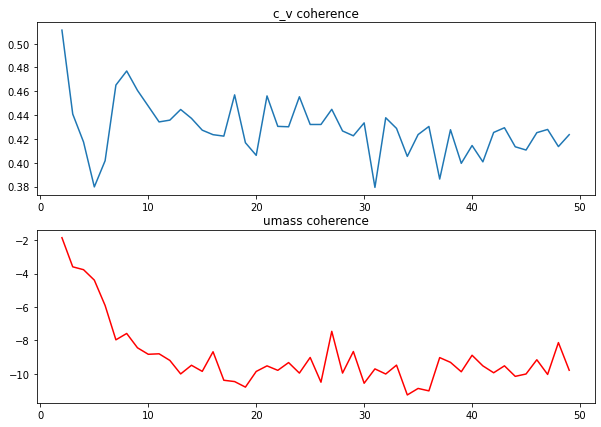

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
ax1.plot(coherence_df['topics'], coherence_df['c_v'])
ax1.set_title('c_v coherence')
ax2.plot(coherence_df['topics'], coherence_df['u_mass'], c='red')
ax2.set_title('umass coherence')
plt.show()

In [42]:
coherence_df.sort_values(by='c_v', ascending=False).head(10)

,topics,c_v,u_mass
0,2,0.511298,-1.855476
6,8,0.477013,-7.590420
5,7,0.465180,-7.971007
7,9,0.460693,-8.448322
16,18,0.456970,-10.470723
19,21,0.456085,-9.530092
22,24,0.455375,-9.962680
8,10,0.447513,-8.836800
25,27,0.444834,-7.462519
11,13,0.444687,-10.012687


In [43]:
coherence_df.sort_values(by='u_mass').head(5)

,topics,c_v,u_mass
32,34,0.405328,-11.271055
34,36,0.430455,-11.027438
33,35,0.423638,-10.881522
17,19,0.416796,-10.802571
28,30,0.433451,-10.570560


In [44]:
# coherence_df.to_csv("coherence_df.csv")

## Run model with best coherence score to see if topics make more sense

In [45]:
# setting alpha and eta as autotune
# best_n_topics for highest c_v
best_n = coherence_df[['topics','c_v']].sort_values(by='c_v', ascending=False).iloc[0][0]
# best_n = 8
lda_model_2 = gensim.models.LdaModel(
        corpus = corpus, 
        id2word = id2word, 
        num_topics = best_n, 
        random_state = 100, 
        chunksize=100,
        iterations = 400,
        alpha='auto', 
        eta= 'auto',
        passes=100, 
        update_every=1,
        per_word_topics=False
    )    

coherence_model_lda_cv = CoherenceModel(model=lda_model_2, texts=texts, dictionary=id2word, coherence='c_v').get_coherence() 
print(coherence_model_lda_cv)
print(lda_model_2.log_perplexity(corpus))
print(lda_model_2)

0.4770134216022909
-6.468183124403887
LdaModel(num_terms=774, num_topics=8, decay=0.5, chunksize=100)


In [46]:
vis = pyLDAvis.gensim_models.prepare(lda_model_2, 
                                     corpus, 
                                     id2word, 
                                     mds="mmds", 
                                     R=30)
vis

C:\Users\asanchez\AppData\Local\Continuum\anaconda3\envs\VirEnv_1\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.333834  0.121396       1        1  27.165605
3     -0.082723 -0.366979       2        1  24.996481
2     -0.319997 -0.139722       3        1  14.310455
0     -0.078214  0.384580       4        1  12.381421
1      0.277231 -0.252064       5        1   9.966896
7      0.363441  0.122919       6        1   7.165061
6      0.114177  0.178239       7        1   2.299744
5      0.059920 -0.048369       8        1   1.714336, topic_info=         Term        Freq       Total Category  logprob  loglift
25       work  135.000000  135.000000  Default  30.0000  30.0000
6        need  238.000000  238.000000  Default  29.0000  29.0000
31     client  211.000000  211.000000  Default  28.0000  28.0000
221      sure   81.000000   81.000000  Default  27.0000  27.0000
110      send   46.000000   46.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
589    moment    0.941444    3.039298   Topic8  -5.0901   2.8942
238     tight    2.246336    7.758184   Topic8  -4.2205   2.8267
249      cost    3.117256   15.610404   Topic8  -3.8928   2.4552
320       new    3.252086   40.031057   Topic8  -3.8505   1.5558
334  document    1.083607    9.930500   Topic8  -4.9495   1.8508

[346 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
458       2  0.279260    aaron
458       7  0.558520    aaron
185       1  0.976899     able
66        3  0.955258  account
12        2  0.110496      add
...     ...       ...      ...
65        5  0.181255     well
65        8  0.036251     well
627       7  0.783624     wire
25        2  0.996907     work
201       5  0.953904     year

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2, 8, 7, 6])

In [47]:
lda_model_2.show_topics(num_words=7)

[(0,
  '0.041*"send" + 0.040*"check" + 0.036*"sample" + 0.031*"email" + 0.030*"add" + 0.026*"survey" + 0.022*"list"'),
 (1,
  '0.030*"plan" + 0.026*"update" + 0.023*"look" + 0.023*"datum" + 0.023*"confirm" + 0.020*"communication" + 0.020*"run"'),
 (2,
  '0.035*"time" + 0.032*"programming" + 0.028*"need" + 0.027*"question" + 0.026*"quick_turn" + 0.024*"way" + 0.020*"account"'),
 (3,
  '0.060*"work" + 0.034*"client" + 0.031*"project" + 0.026*"change" + 0.025*"report" + 0.019*"lot" + 0.018*"team"'),
 (4,
  '0.077*"need" + 0.056*"client" + 0.033*"sure" + 0.033*"time" + 0.025*"thing" + 0.024*"end" + 0.019*"budget"'),
 (5,
  '0.055*"phone" + 0.041*"call" + 0.031*"job" + 0.028*"assign" + 0.028*"theme" + 0.027*"code" + 0.024*"pricing"'),
 (6,
  '0.068*"design" + 0.059*"questionnaire" + 0.036*"decipher" + 0.033*"krusty" + 0.029*"successful" + 0.028*"limitation" + 0.020*"approval"'),
 (7,
  '0.038*"have" + 0.033*"give" + 0.033*"request" + 0.031*"day" + 0.024*"project_team" + 0.022*"non" + 0.021*

In [48]:
# save the final model 
lda_model.save("final_lda_model.model")

## Word cloud of top keywords per each topic 

In [50]:
from wordcloud import WordCloud

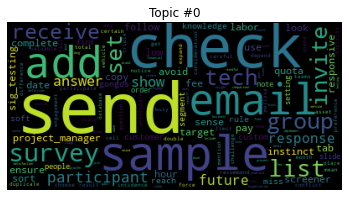

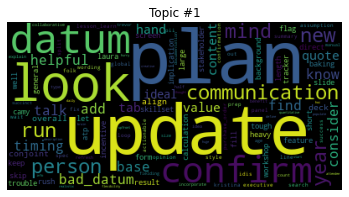

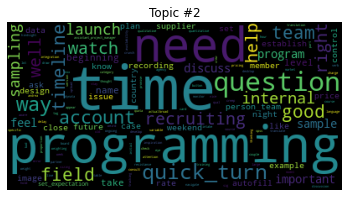

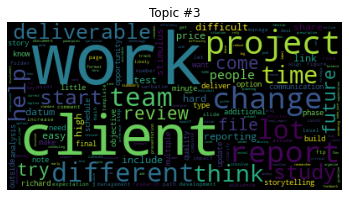

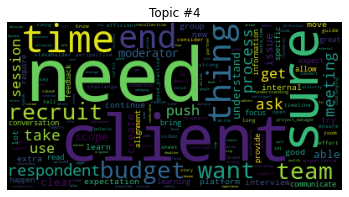

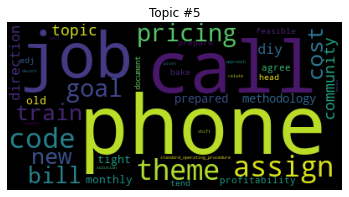

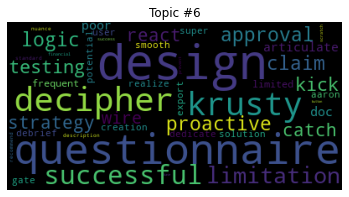

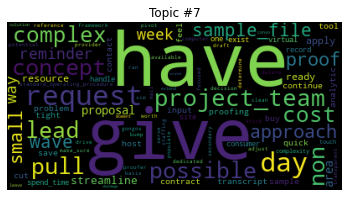

In [51]:
# word cloud of topic keywords 

for t in range(lda_model_2.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model_2.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    title = "Topic #" + str(t)
    plt.savefig(title)
    plt.show()


In [52]:
# for naming topics
topic_names = {
    0: u'Topic 0', 1: u'Topic 1', 2: u'Topic 2', 3: u'Topic 3', 4: u'Topic 4', 
    5: u'Topic 5', 6: u'Topic 6', 7: u'Topic 7', 8: u'Topic 8', 9: u'Topic 9',
    10: u'Topic 10', 11: u'Topic 11', 12: u'Topic 12', 13: u'Topic 13', 14: u'Topic 14',
    15: u'Topic 15', 16: u'Topic 16', 17: u'Topic 17', 18: u'Topic 18', 19: u'Topic 19', 
    20: u'Topic 20', 21: u'Topic 21', 22: u'Topic 23', 23: u'Topic 23', 24: U'Topic 24', 
    25: u'Topic 25', 26: u'Topic 26', 27: u'Topic 27', 28: u'Topic 28', 29: u'Topic 29', 
    30: u'Topic 30', 31: u'Topic 31', 32: u'Topic 32', 33: u'Topic 33', 34: u'Topic 34'}

In [53]:
# sort list of lists
def Sort(sub_li):
    '''
    takes a list and sorts descending by 2nd element in list
    '''
    sub_li.sort(key = lambda x: x[1])
    sub_li.reverse()
    return (sub_li)

In [54]:
def corpus_translate(text, ldamodel):
    '''
    takes a document in the corpus and converts it back to string 
    applies the lda model returns the top 3 topics associated with the document
    '''
    texts = []
    for i in range(len(text)):
        texts.append(id2word[text[i][0]]) # first element in "text" is the index of word in dictionary
    sentence = " ".join(texts)
    score = ldamodel[text]
    score = Sort(score)
    return ((sentence, score))

In [55]:
corpus_translate(corpus[random.randint(0, len(corpus))], lda_model_2)
print(df['Lessons Learned'][0])
print(corpus_translate(corpus[0], lda_model_2))

They need help with Sample Management.  They aren’t going to manage the sample closely themselves.
Didn’t reuse previous coding for the Segmentation analysis (automation).
Survey changes were a little bigger out of the scope for changes outside of the segmentation.
 
('analysis big change help manage management need previous sample scope segmentation survey', [(3, 0.46783108), (4, 0.22309394), (0, 0.16085275), (2, 0.063896425), (1, 0.036368098), (7, 0.02914281), (6, 0.010328581)])


## Running queries based on similarity


In [56]:
# randomly select a lesson learned from the datafile
rand = random.randint(0, df['Lessons Learned'].shape[0])
test_text=df['Lessons Learned'].iloc[rand]
test_text

"New clients that have not seen our survey platform, may need to see how our surveys look and get an overview of our standard capabilities during/prior start of project.\n\nContinue to learn how much to communicate (over communicate) and how fast to align with Rocky's style. With these types of clients, you need to make sure you are 1 or 2 steps ahead and send updates, even if there are no updates.\xa0\n\nContinue to be diligent in proofing every deliverable.\n\nBeing more firm on turnaround times and expectations on when things will get done and how long they take, regularly.\xa0\n\xa0"

In [57]:
# basic text preprocess to apply lda model and display top topics and scores 
text = [test_text.split()]
bow = id2word.doc2bow(text[0])
score = lda_model_2[bow]
print(test_text,"\n")
for i, v in enumerate(score):
    topic_num = score[i][0]
    topic_perc = score[i][1]
    print(f"{topic_names[topic_num]:10}{topic_perc}")

New clients that have not seen our survey platform, may need to see how our surveys look and get an overview of our standard capabilities during/prior start of project.

Continue to learn how much to communicate (over communicate) and how fast to align with Rocky's style. With these types of clients, you need to make sure you are 1 or 2 steps ahead and send updates, even if there are no updates. 

Continue to be diligent in proofing every deliverable.

Being more firm on turnaround times and expectations on when things will get done and how long they take, regularly. 
  

Topic 0   0.17397259175777435
Topic 1   0.0551694817841053
Topic 2   0.04502684250473976
Topic 3   0.2544425427913666
Topic 4   0.35967516899108887
Topic 7   0.09452797472476959


In [58]:
from gensim import similarities
 
lda_index = similarities.MatrixSimilarity(lda_model_2[corpus])
 
similarities = lda_index[lda_model_2[bow]]

# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top 5 most similar documents:
print(similarities[:10])
 
# most similar document
document_id, similarity = similarities[0]
print(data_bigrams_trigrams[document_id])

[(156, 0.9951609), (215, 0.9910294), (122, 0.9840348), (200, 0.9837182), (204, 0.9830736), (96, 0.9799921), (283, 0.9797194), (226, 0.97955656), (281, 0.9791842), (188, 0.9788998)]
['kerry', 'able', 'write', 'report', 'day', 'focus', 'time', 'consideration', 'move', 'limit', 'number', 'project', 'find', 'way', 'limit', 'work', 'focus']


In [59]:
# prints the top 10 most similar documents to the one queried above
print(test_text)
print('\n')
for doc_position, doc_score in similarities[:10]:
    print(doc_position, doc_score, data_bigrams_trigrams[doc_position])

New clients that have not seen our survey platform, may need to see how our surveys look and get an overview of our standard capabilities during/prior start of project.

Continue to learn how much to communicate (over communicate) and how fast to align with Rocky's style. With these types of clients, you need to make sure you are 1 or 2 steps ahead and send updates, even if there are no updates. 

Continue to be diligent in proofing every deliverable.

Being more firm on turnaround times and expectations on when things will get done and how long they take, regularly. 
 


156 0.9951609 ['kerry', 'able', 'write', 'report', 'day', 'focus', 'time', 'consideration', 'move', 'limit', 'number', 'project', 'find', 'way', 'limit', 'work', 'focus']
215 0.9910294 ['build', 'budget', 'meeting', 'consensus', 'drive', 'organization']
122 0.9840348 ['sure', 'check', 'login', 'access', 'session']
200 0.9837182 ['challenge', 'recruiting', 'rate', 'see', 'project', 'recruit', 'sample', 'oversight', 'sc

# Create table that shows top 5 sentences per topic based on topic contribution 

In [60]:
docs_with_scores_df = {"Document_No":[], "Lesson_Learned":[], "Scores":[],
                       "Main_Topic":[],"Perc_Cont":[], 
                       "Second_Topic":[], "Perc_Cont_2":[],
                       "Third_Topic":[], "Perc_Cont_3":[]}
for i in range(len(corpus)):
    document = i, 
    text_string = corpus_translate(corpus[i], lda_model_2)
    text = text_string[0]
    scores = Sort(text_string[1])
    try:
        topic_1 = (scores[0])
        topic_2 = (scores[1])
        topic_3 = (scores[2])
        topic_num_1, perc_1 = topic_1
        topic_num_2, perc_2 = topic_2
        topic_num_3, perc_3 = topic_3
        topic_name_1 = topic_names[topic_num_1]
        topic_name_2 = topic_names[topic_num_2]
        topic_name_3 = topic_names[topic_num_3]
        docs_with_scores_df['Document_No'].append(document[0])
        docs_with_scores_df['Lesson_Learned'].append(text)
        docs_with_scores_df['Scores'].append(Sort(scores))

        docs_with_scores_df['Main_Topic'].append(topic_name_1)
        docs_with_scores_df['Perc_Cont'].append(perc_1)

        docs_with_scores_df['Second_Topic'].append(topic_name_2)
        docs_with_scores_df['Perc_Cont_2'].append(perc_2)

        docs_with_scores_df['Third_Topic'].append(topic_name_3)
        docs_with_scores_df['Perc_Cont_3'].append(perc_3)
    except:
        pass

In [61]:
docs_with_scores_df = pd.DataFrame(docs_with_scores_df)
docs_with_scores_df.sample(10)

,Document_No,Lesson_Learned,Scores,Main_Topic,Perc_Cont,Second_Topic,Perc_Cont_2,Third_Topic,Perc_Cont_3
97,97,team work timeline report proof tight error in...,"[(3, 0.24616121), (4, 0.21570528), (6, 0.16124...",Topic 3,0.246161,Topic 4,0.215705,Topic 6,0.161249
310,310,team ask feel field thing clear sure cost sugg...,"[(4, 0.49551734), (2, 0.17073883), (3, 0.13174...",Topic 4,0.495517,Topic 2,0.170739,Topic 3,0.131743
317,317,help effort client communication thinking upda...,"[(4, 0.3936868), (3, 0.22157694), (2, 0.194851...",Topic 4,0.393687,Topic 3,0.221577,Topic 2,0.194851
220,220,help sample work client set different avoid pl...,"[(3, 0.3564021), (2, 0.25164884), (0, 0.119710...",Topic 3,0.356402,Topic 2,0.251649,Topic 0,0.119711
40,40,analysis help need survey add bring planning w...,"[(3, 0.5556556), (4, 0.20387301), (0, 0.119138...",Topic 3,0.555656,Topic 4,0.203873,Topic 0,0.119139
294,294,scope set questionnaire level sure development...,"[(4, 0.26382664), (3, 0.2178595), (2, 0.185911...",Topic 4,0.263827,Topic 3,0.217860,Topic 2,0.185911
246,246,need continue value client find price year del...,"[(3, 0.33349946), (1, 0.23929861), (4, 0.23833...",Topic 3,0.333499,Topic 1,0.239299,Topic 4,0.238330
197,197,time launch project research force phase ready...,"[(3, 0.3401284), (4, 0.16272631), (0, 0.145799...",Topic 3,0.340128,Topic 4,0.162726,Topic 0,0.145799
181,181,help scope team work client time dynamic ask f...,"[(4, 0.40324444), (3, 0.16007237), (2, 0.15936...",Topic 4,0.403244,Topic 3,0.160072,Topic 2,0.159365
71,71,need team time role communication take meeting...,"[(4, 0.39794174), (3, 0.21111235), (1, 0.18792...",Topic 4,0.397942,Topic 3,0.211112,Topic 1,0.187924


In [62]:
N = 5
grouped = docs_with_scores_df.groupby(['Main_Topic', 'Perc_Cont'])
top_lessons_by_topic = grouped.apply(lambda g: g.sort_values(by='Perc_Cont', ascending=False).head(N))
top_lessons_by_topic

Document_No  \
Main_Topic Perc_Cont                    
Topic 0    0.219814  263          263   
           0.225834  254          254   
           0.256630  164          164   
           0.275370  144          144   
           0.278285  234          234   
...                               ...   
Topic 4    0.741532  68            68   
Topic 5    0.391702  73            73   
Topic 7    0.258755  8              8   
           0.376243  16            16   
           0.447275  24            24   

                                                             Lesson_Learned  \
Main_Topic Perc_Cont                                                          
Topic 0    0.219814  263  get promise mind engagement keep start align e...   
           0.225834  254                                    check field tab   
           0.256630  164  help decipher export challenge data datum feel...   
           0.275370  144  survey bring continue give ensure set update a...   
           0.278285  234  sample survey work client different plan get i...   
...                                                                     ...   
Topic 4    0.741532  68   big change help need scope survey give team wo...   
Topic 5    0.391702  73   need team work client role communication know ...   
Topic 7    0.258755  8    sample way client account field send delete du...   
           0.376243  16   need sample work update launch timeline conver...   
           0.447275  24   give way work client folder challenge feel fut...   

                                                                     Scores  \
Main_Topic Perc_Cont                                                          
Topic 0    0.219814  263  [(0, 0.21981399), (3, 0.1885803), (1, 0.178252...   
           0.225834  254  [(0, 0.22583441), (4, 0.20857494), (3, 0.18811...   
           0.256630  164  [(0, 0.25662953), (3, 0.23849344), (2, 0.20228...   
           0.275370  144  [(0, 0.27537012), (3, 0.1777497), (2, 0.153718...   
           0.278285  234  [(0, 0.27828455), (4, 0.2730101), (3, 0.248446...   
...                                                                     ...   
Topic 4    0.741532  68   [(4, 0.741532), (3, 0.21810365), (2, 0.0137619...   
Topic 5    0.391702  73   [(5, 0.39170152), (4, 0.21678439), (3, 0.19113...   
Topic 7    0.258755  8    [(7, 0.2587548), (0, 0.18044919), (3, 0.150114...   
           0.376243  16   [(7, 0.37624347), (3, 0.22478217), (4, 0.15736...   
           0.447275  24   [(7, 0.44727546), (4, 0.25700706), (3, 0.19268...   

                         Main_Topic  Perc_Cont Second_Topic  Perc_Cont_2  \
Main_Topic Perc_Cont                                                       
Topic 0    0.219814  263    Topic 0   0.219814      Topic 3     0.188580   
           0.225834  254    Topic 0   0.225834      Topic 4     0.208575   
           0.256630  164    Topic 0   0.256630      Topic 3     0.238493   
           0.275370  144    Topic 0   0.275370      Topic 3     0.177750   
           0.278285  234    Topic 0   0.278285      Topic 4     0.273010   
...                             ...        ...          ...          ...   
Topic 4    0.741532  68     Topic 4   0.741532      Topic 3     0.218104   
Topic 5    0.391702  73     Topic 5   0.391702      Topic 4     0.216784   
Topic 7    0.258755  8      Topic 7   0.258755      Topic 0     0.180449   
           0.376243  16     Topic 7   0.376243      Topic 3     0.224782   
           0.447275  24     Topic 7   0.447275      Topic 4     0.257007   

                         Third_Topic  Perc_Cont_3  
Main_Topic Perc_Cont                               
Topic 0    0.219814  263     Topic 1     0.178253  
           0.225834  254     Topic 3     0.188117  
           0.256630  164     Topic 2     0.202284  
           0.275370  144     Topic 2     0.153718  
           0.278285  234     Topic 3     0.248446  
...                              ...          ...  
Topic 4    0.741532  68      To

In [63]:
top_lessons_by_topic= top_lessons_by_topic[['Document_No','Main_Topic','Perc_Cont','Lesson_Learned','Scores']]

In [64]:
top_lessons_by_topic.to_csv("top_lessons_by_topic.csv")

## Trying out a Hierarchical Dirichlet Process (HDP)  

### Hierarchical produced highest coherence but topics dont make much sense to me

In [65]:
#from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel

hdp = HdpModel(corpus, id2word)

In [66]:
topic_info = hdp.print_topics(num_topics=150, num_words=10, )

In [67]:
vis = pyLDAvis.gensim_models.prepare(hdp, 
                                     corpus, 
                                     id2word, 
                                     mds="mmds", 
                                     R=30)
vis

C:\Users\asanchez\AppData\Local\Continuum\anaconda3\envs\VirEnv_1\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22     0.118008  0.043313       1        1  4.778353
24    -0.026450 -0.107950       2        1  4.209146
13    -0.048573 -0.113543       3        1  3.924130
138   -0.042154 -0.060970       4        1  3.039694
59     0.057066 -0.086891       5        1  2.634725
...         ...       ...     ...      ...       ...
108    0.028942  0.039202     146        1  0.028573
93     0.033051  0.020870     147        1  0.014551
139   -0.042626  0.119530     148        1  0.000929
143   -0.147892  0.032322     149        1  0.000480
147   -0.039372  0.151138     150        1  0.000133

[150 rows x 5 columns], topic_info=           Term       Freq      Total  Category  logprob  loglift
507        easy  14.000000  14.000000   Default  30.0000  30.0000
147     meeting  13.000000  13.000000   Default  29.0000  29.0000
746     similar  10.000000  10.000000   Default  28.0000  28.0000
455    deadline  13.000000  13.000000   Default  27.0000  27.0000
348    decision  13.000000  13.000000   Default  26.0000  26.0000
..          ...        ...        ...       ...      ...      ...
300      upload   0.000053  12.121971  Topic150  -5.4198   1.1811
748    valuable   0.000058  13.533293  Topic150  -5.3223   1.1685
349       extra   0.000054  12.669018  Topic150  -5.4006   1.1562
413     control   0.000052  13.216970  Topic150  -5.4317   1.0827
204  consistent   0.000051  12.832211  Topic150  -5.4516   1.0924

[5314 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
458       1  0.100026  aaron
458       3  0.100026  aaron
458       4  0.100026  aaron
458       5  0.100026  aaron
185       1  0.075340   able
...     ...       ...    ...
361       6  0.088063   zoom
361       7  0.088063   zoom
361       9  0.088063   zoom
361      10  0.088063   zoom
361      14  0.088063   zoom

[2298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 25, 14, 139, 60, 6, 128, 32, 65, 130, 92, 55, 30, 81, 138, 11, 123, 22, 119, 3, 93, 17, 63, 124, 24, 98, 7, 49, 20, 76, 36, 19, 37, 56, 85, 52, 4, 40, 105, 21, 145, 51, 9, 149, 27, 108, 26, 50, 84, 10, 8, 114, 71, 61, 89, 54, 44, 88, 47, 69, 73, 43, 134, 31, 107, 77, 59, 41, 29, 97, 18, 42, 106, 78, 118, 102, 2, 57, 64, 16, 83, 46, 34, 1, 146, 5, 15, 12, 121, 100, 150, 116, 58, 143, 141, 101, 112, 62, 136, 82, 104, 13, 39, 48, 45, 115, 38, 75, 129, 137, 142, 72, 28, 35, 127, 125, 53, 66, 133, 110, 91, 80, 96, 70, 132, 74, 103, 113, 126, 67, 86, 68, 135, 147, 122, 33, 111, 90, 120, 87, 95, 99, 131, 79, 117, 109, 94, 140, 144, 148])

In [68]:
# save results to csv 
import csv
def write_to_csv(topic_info):
    with open("hdp_topic_info.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(topic_info)
write_to_csv(topic_info)

In [69]:
hdp_coherence = CoherenceModel(hdp, texts=texts, dictionary=id2word, coherence='c_v').get_coherence()
print(round(hdp_coherence, 4))

0.6316


In [70]:
# save model 
hdp.save("final_hdp_model.model")

# Merge results with main dataframe 

In [71]:
results = []
for doc in df['Tokens']:
    a_list =[]
    if 'nan' not in doc:
        bow = id2word.doc2bow(doc)
        scores = lda_model_2[bow]
        scores = Sort(scores)[:1]
        new_scores = []
        for score in scores:
            topx_num, perc = score
            combined_result = (f"{topic_names[topx_num]}")
            new_scores.append(combined_result)
        results.append(new_scores)
    else:
        results.append('missing')

In [72]:
df['Main Topic'] = results

C:\Users\asanchez\AppData\Local\Temp/ipykernel_11372/226086543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Main Topic'] = results


In [73]:
df.index.names = ['Index']

In [74]:
df.to_csv("final_df_with_topics.csv")

In [75]:
new_df = pd.read_csv("final_df_with_topics.csv")

In [76]:
new_df.sample(5)

,Index,Project,Client Number,Project_Name,Client_Name,Debrief Date,Lessons Learned,Successes,Positive Impact?,Oversight,...,Expenses,Net Revenue,NR %,Custom Labor Amount,Gross Margin,GM %,GPPL $,Custom Hours,Tokens,Main Topic
16,16,AMW210721R,AMW,A70 Executive Governance,Amway,2021-08-27,Keep momentum with the team,Flexible w client needs\nEfficient in tool cre...,Yes,NaN,...,330.14,29069.86,0.988771,4865.75,24204.11,0.823269,4.974384,62.75,"['momentum', 'team']",['Topic 4']
83,83,COX190351R,COX,Smart Help FGs,Cox Communications,2021-06-07,NaN,great client work,Yes,"Burgan, Nathan",...,0.00,-18.50,1.000000,0.00,-18.50,1.000000,0.000000,0.00,['nan'],missing
321,321,UHG210321R,UHG,Employee Comms Preferences EX,UnitedHealth Group,2021-08-27,Alignment up front with the report - weird tim...,Newer to EX audience\nClient happy with result...,Yes,"Mingesbruney, James",...,450.00,23050.00,0.980851,6831.00,16219.00,0.690170,2.374323,135.50,"['alignment', 'report', 'weird', 'timing', 'ji...",['Topic 4']
104,104,EDJ210302R,EDJ,Edward Jones Cash & Lending Reg U IDIs,Edward Jones,2021-04-28,Watch timing with other projects to maximize e...,Successful project overall - happy participant...,Yes,"Jiles, Tonya",...,2014.08,9185.92,0.820171,1230.50,7955.42,0.710305,6.465193,39.50,"['watch', 'timing', 'project', 'maximize', 'ef...",['Topic 3']
48,48,BCM200708R,BCM,BCBSM CMCX Value Dashboard & Reporting,Blue Cross Blue Shield Michigan,2021-02-24,Too much time upfront trying to get end goal o...,Continuation of our earlier work in establishi...,Yes,NaN,...,0.00,0.00,0.000000,450.25,-450.25,0.000000,-1.000000,7.25,"['time', 'upfront', 'try', 'end', 'goal', 'aar...",['Topic 4']


In [77]:
new_df.groupby(by=['Main Topic','Positive Impact?']).agg('mean')

Index  Custom Revenue      Expenses  \
Main Topic  Positive Impact?                                             
['Topic 0'] Yes               210.642857    48718.636071  11010.590714   
['Topic 1'] Yes               125.727273    34523.030000   5252.274545   
['Topic 2'] Yes               187.913043    60509.215652  16039.282609   
['Topic 3'] No                345.500000     2100.000000     37.500000   
            Unsure            271.000000     1740.430000    334.166667   
            Yes               185.598131    37441.144906   8922.212453   
['Topic 4'] Unsure            262.000000    59521.830000  12664.150000   
            Yes               174.239521    39133.413675   7919.231386   
['Topic 5'] Yes                77.000000    35000.000000      0.000000   
['Topic 7'] Yes                22.000000    33500.000000  10391.000000   
missing     Unsure            237.333333    11464.296667   7333.333333   
            Yes               147.692308    14407.986154   5381.950000   

                               Net Revenue      NR %  Custom Labor Amount  \
Main Topic  Positive Impact?                                                
['Topic 0'] Yes               37708.045357  0.792010          9893.080357   
['Topic 1'] Yes               29270.755455  0.848508          7115.454545   
['Topic 2'] Yes               44469.933043  0.748792         11026.869565   
['Topic 3'] No                 2062.500000  0.977941           567.125000   
            Unsure             1406.263333  0.964825           302.916667   
            Yes               28518.932453  0.758423          7129.639151   
['Topic 4'] Unsure            46857.680000  0.783950         16267.500000   
            Yes               31214.182289  0.784120          7686.683735   
['Topic 5'] Yes               35000.000000  1.000000          7375.000000   
['Topic 7'] Yes               23109.000000  0.669736          6251.375000   
missing     Unsure             4130.963333  0.403756           866.000000   
            Yes                9026.036154  0.753295          1773.461538   

                              Gross Margin      GM %      GPPL $  Custom Hours  
Main Topic  Positive Impact?                                                    
['Topic 0'] Yes               27814.965000  0.590634    3.997263    196.107143  
['Topic 1'] Yes               22155.300909  0.647333 -145.942485    136.227273  
['Topic 2'] Yes               33443.063478  0.570869   12.017478    222.673913  
['Topic 3'] No                 1495.375000  0.673985    3.960015     11.500000  
            Unsure             1103.346667  0.932939    2.783586      7.583333  
            Yes               21389.293302  0.515826   20.779516    141.627358  
['Topic 4'] Unsure            30590.180000  0.508713    1.867308    303.375000  
            Yes               23527.498554  0.587714    5.194694    145.397590  
['Topic 5'] Yes               27625.000000  0.789286    3.745763    125.000000  
['Topic 7'] Yes               16857.625000  0.489309    2.767668    133.000000  
missing     Unsure             3264.963333  0.279577   13.179969     14.666667  
            Yes                7252.574615  0.656338    7.810061     35.596154

In [78]:
from collections import Counter
Counter(new_df['Positive Impact?'])

Counter({'Yes': 352, 'Unsure': 8, 'No': 2})

In [79]:
Counter(new_df['Main Topic'])

Counter({"['Topic 3']": 112,
         "['Topic 4']": 169,
         "['Topic 2']": 23,
         "['Topic 0']": 28,
         'missing': 16,
         "['Topic 1']": 11,
         "['Topic 7']": 2,
         "['Topic 5']": 1})

In [80]:
winsound.Beep(freq, duration)